# Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

# 引入資料 資料分析

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(train_data.columns)
print('-'*79)
print(test_data.columns)

print(train_data.head(10))
print('-'*79)
print('Passengers:',train_data.shape[0],'Features',train_data.shape[1])


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
-------------------------------------------------------------------------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1  

PassengerId: 乘客
Survived: 是否生還
Pclass: 艙位等級 --> 1,2,3 / 1最高
Name: 乘客姓名
Sex: 乘客性別
Age: 年齡
SibSP: 
Parch: 父母和孩子
Ticket: 票的數位
Fare: 票價
Cabin: 船艙號碼
Embarked: 登船艙


In [4]:
#輸出各特徵基本資料
#Null --> 缺失值

train_data.info()

#計算各特徵缺失值
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

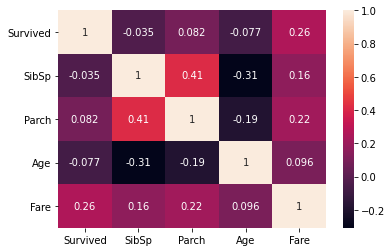

In [5]:
##heatmap --> 熱圖
## corr() --> 相關係數
heatmap = sns.heatmap(train_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr()
                      , annot = True)


###由圖可知 --> 特徵[fare] 和 是否生存[survived] 較有關係




0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:ylabel='Survived'>

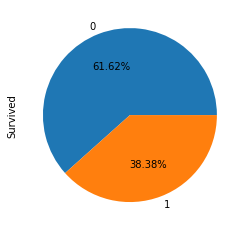

In [6]:
##訓練資料生存圓餅圖
## autopct --> 顯示百分比 
print(train_data['Survived'].value_counts())
train_data['Survived'].value_counts().plot.pie(autopct='%1.2f%%')



3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:ylabel='Pclass'>

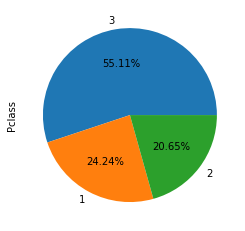

In [7]:
#座艙等級圓餅圖分析
print(train_data['Pclass'].value_counts())
train_data['Pclass'].value_counts().plot.pie(autopct='%1.2f%%')

3    218
1    107
2     93
Name: Pclass, dtype: int64


<AxesSubplot:ylabel='Pclass'>

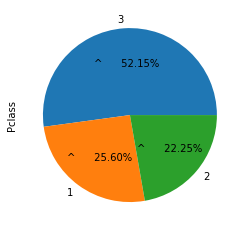

In [8]:
##測試資料艙位等級圓餅圖分析
print(test_data['Pclass'].value_counts())
test_data['Pclass'].value_counts().plot.pie(autopct='^%11.2f%%')

#####兩張圓餅圖對比可知 --> train和 test 資料相差不大

<AxesSubplot:xlabel='Pclass', ylabel='count'>

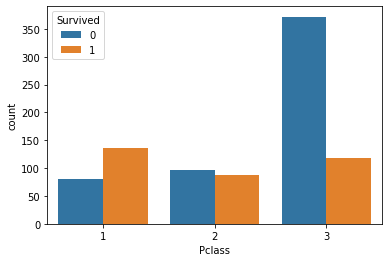

In [9]:
###艙位等級和生存對比

sns.countplot(x='Pclass',hue='Survived',data = train_data)


<AxesSubplot:xlabel='Pclass'>

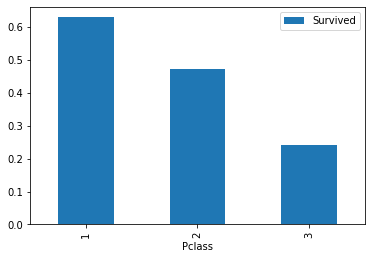

In [10]:
###比較艙位等級存活率
###將 Survived 資料依 Pclass(船艙等級) 分組
###分組後 計算生存平均值


train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

<AxesSubplot:xlabel='Pclass,Sex'>

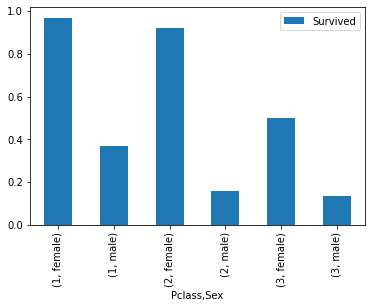

In [11]:
####比較艙位等級、性別 的生存比例

train_data[['Sex','Survived','Pclass']].groupby(['Pclass','Sex']).mean().plot.bar()

##看圖可知 --> 不論哪種等級的艙，女性生存比例都較高


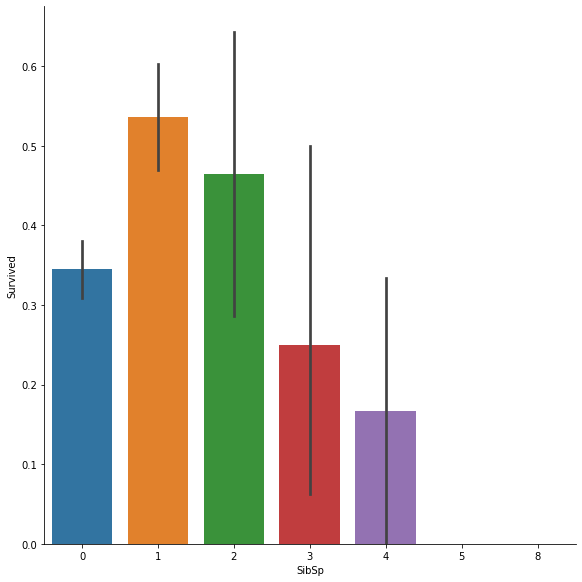

In [12]:
bargraph_sibsp = sns.catplot(x = 'SibSp', y = 'Survived', data = train_data,kind='bar',height = 8)


##由圖可知 --> 只有1~2個家屬或朋友的生存率較高


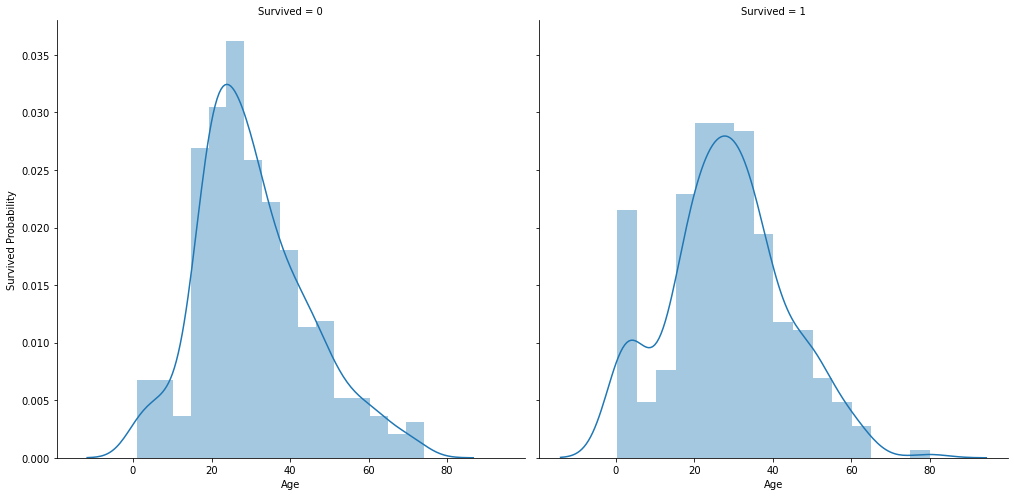

In [13]:
ageplot = sns.FacetGrid(train_data, col = 'Survived', height = 7)
##distplot --> 很好用
ageplot = ageplot.map(sns.distplot,'Age')
ageplot = ageplot.set_ylabels('Survived Probability')

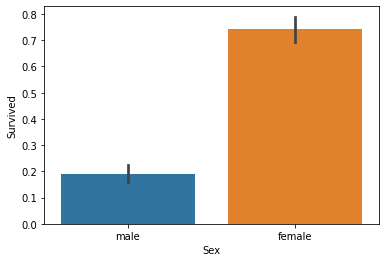

In [14]:
#性別生存率

sexplot = sns.barplot(x = 'Sex',y = 'Survived',data=train_data)

#由圖可知 --> 女性生存率遠大於男性
## 因此性別對預測很重要

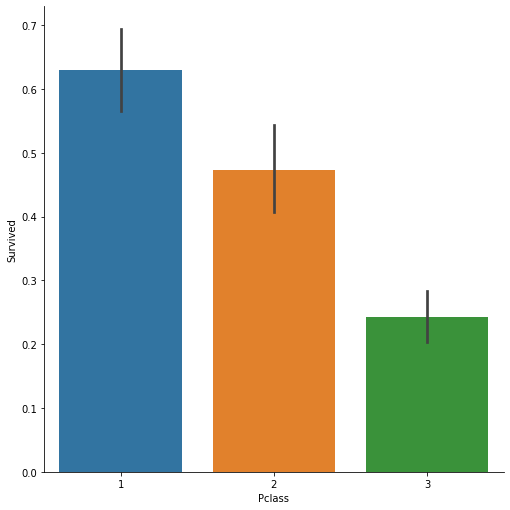

In [15]:
##船艙生存率

Pclass_plot = sns.catplot(x='Pclass',y='Survived',data=train_data,kind = 'bar',height=7)



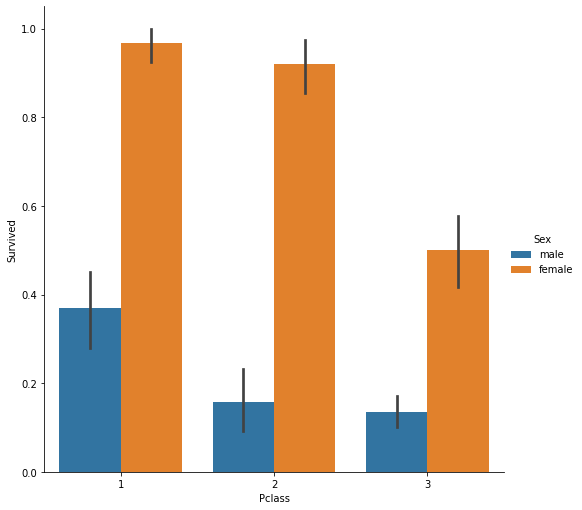

In [16]:
###船艙男女生存比例

Pclass_sex_plot = sns.catplot(x='Pclass',y = 'Survived',hue='Sex',data = train_data,kind='bar',height =7)

In [17]:
###Embarked

print(train_data['Embarked'].isnull().sum())
#Embarked 有缺失值

print(train_data['Embarked'].value_counts())
#找到Embarked 中最多的資料 --> S

train_data['Embarked'] = train_data['Embarked'].fillna('S')
###將缺失值改為最多的值

2
S    644
C    168
Q     77
Name: Embarked, dtype: int64


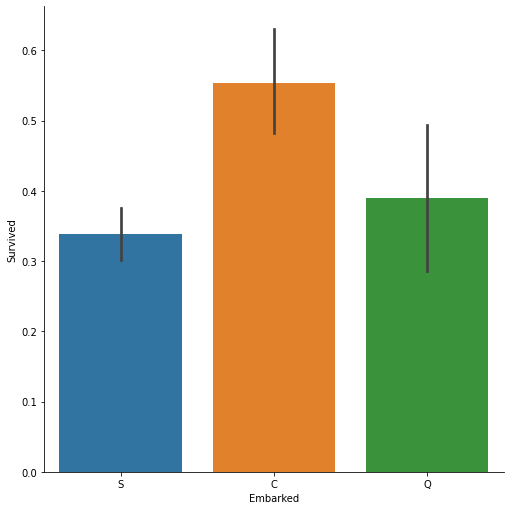

In [18]:
sns.catplot(x='Embarked',y = 'Survived',data = train_data,kind='bar',height = 7)

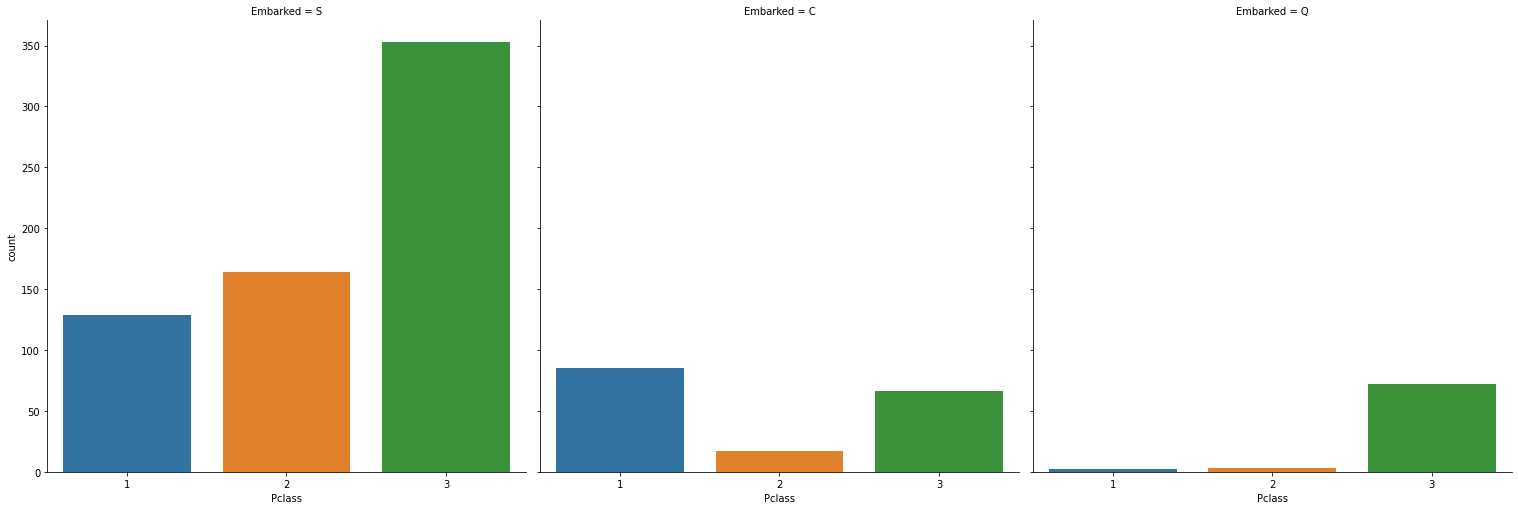

In [19]:
sns.catplot(x='Pclass',col='Embarked',data=train_data,kind='count',height = 7)

#由圖可知 --> 上圖從 c 登船的乘客存活率最高，原因是下圖的c中，第1艙的人數最多(有錢人最多)

# 資料處理

處理遺失值

In [20]:
train_data.isnull().sum()
##剩兩個feature 有缺失值

##由下面可知 --> Age的資料缺失不算太多
###             而 Cabin資料遺漏太多，考慮直接不採用(刪掉)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
Age_mean = train_data['Age'].mean()
print('Age平均值',Age_mean)

Age_std = train_data['Age'].std()
print('Age標準差',Age_std)

Age平均值 29.69911764705882
Age標準差 14.526497332334042


In [22]:
##從平均值減標準差  到 平均值加標準差 的範圍中隨機挑選 177 個值
rand_age = np.random.randint(Age_mean - Age_std , Age_mean + Age_std,size = 177)

#複製一個['Age'] 的資料來處理遺失值
age_slice = train_data['Age'].copy()
##填補
age_slice[np.isnan(age_slice)] = rand_age
##填補完成後套用回去
train_data['Age'] = age_slice



In [23]:
##Age 的缺失值已填補完畢
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# 最終處理資料

# 刪除較用不到的資料列

In [24]:
##由之前的分析可知 --> ['PassengerId','Ticket','Cabin','Name'] 是與生存率最不相關的特徵(Cabin是由於缺失值太多)
## 因此可以刪除他們

drop_col = ['PassengerId','Ticket','Cabin','Name']
train_data.drop(drop_col,axis = 1 , inplace = True)
## axis = 1 --> 刪除columns
## inplace = True --> 是否直接取代



In [25]:
##刪除完成

train_data.head()


#觀察 DataFrame 裡，Sex 跟 Embarked 資料中有非數字的資料 
## 因此要到下一步

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Converting Categorical Variables to Numeric
# 將非數字資料轉換為數字

In [27]:
### 機器學習無法用 **英文單字** 進行學習
### 因此須將單字轉為簡單的數字

genders = {'male':0,'female':1}
train_data['Sex'] = train_data['Sex'].map(genders)  ##將Sex中資料調整為 gender


ports = {'S':0,'C':1,'Q':2}
train_data['Embarked'] = train_data['Embarked'].map(ports) ##將Embarked中資料調整為 ports

train_data.head()

##處理完成

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# ML模組

In [45]:
## 選擇好 x(特徵) 跟 y(答案)

df_train_x = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

df_train_y = train_data[['Survived']]


#---------------------------------------
######將 train 資料分割成 train 跟 test ######

### train_test_split(train_data ,  train_target , test_size , random_state)
### train_data --> 要劃分的樣本特徵集
### train_target --> 要劃分的樣本結果
### test_size --> 測試資料占比 
### random_state --> 整數 : 每次結果都不一樣 ； 0 或 不填 : 每次結果都不一樣
x_train, x_test ,y_train ,y_test = train_test_split(df_train_x, df_train_y, test_size = 0.2 , random_state = 42)

# (A) 隨機森林分類 Random Forest Classifier

In [46]:
clf1 = RandomForestClassifier()  #建造隨機森林模組

clf1.fit(x_train,y_train)  ## 開始用train資料訓練模組

rfc_y_pred = clf1.predict(x_test)  #用test 資料預測結果

rfc_accuracy = accuracy_score(y_test, rfc_y_pred) * 100  ##用 test_y(解答) 比對 rfc_y_pred(預測結果)
                                                         ##比對後，算出正確率
print('隨機森林')
print('正確率(accuracy):',rfc_accuracy)



隨機森林
正確率(accuracy): 84.91620111731844


# (B)邏輯回歸 Logistic Regression
# 切記 --> 它是一種分類方法，不是回歸

In [47]:
clf2 = LogisticRegression()   #建構邏輯回歸模組
clf2.fit(x_train, y_train)   #訓練模組 

LR_y_pred = clf2.predict(x_test)  #預測結果
LR_accuracy = accuracy_score(y_test, LR_y_pred) *100  #計算正確率

print('邏輯回歸')
print('正確率(accuracy):', LR_accuracy)

邏輯回歸
正確率(accuracy): 81.00558659217877


# (C) K近鄰演算法  K-Neighbors Classifier

In [50]:
#KNeighborsClassifies(n_neighbors=5, algorithm='auto')  
# n_neighboes --> 查找的鄰居數，預設為5
# algorithm --> 選擇要使用的演算法，auto會找最適合你的資料
#更多資料:
#http://www.taroballz.com/2018/07/08/ML_KNeighbors_Classifier/

clf3 = KNeighborsClassifier(5)  
clf3.fit(x_train,y_train)

knc_y_pred = clf3.predict(x_test)
knc_accuracy = accuracy_score(y_test, knc_y_pred) * 100

print('K近鄰演算法')
print('正確率(accuracy):',knc_accuracy)

K近鄰演算法
正確率(accuracy): 74.86033519553072


# (D)決策樹分類器 Decision Tree Classsifier

In [52]:
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(x_train,y_train)

dtc_y_pred = clf4.predict(x_test)
dtc_accuracy = accuracy_score(y_test, dtc_y_pred) *100

print('K近鄰演算法')
print('正確率(accuracy):',knc_accuracy)

決策樹分類器
正確率(accuracy): 78.2122905027933


# (E)支援向量機 Support Vector Machine
# 可用於處裡非線性分類


In [54]:
##參考資料 --> https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b
clf5 = svm.SVC()
clf5.fit(x_train,y_train)

svm_y_pred = clf5.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred) *100

print('支持向量機')
print('正確率(accuracy):',svm_accuracy)


支持向量機
正確率(accuracy): 71.50837988826815


# 五種方法正確率


In [61]:
print('隨機森林')
print('正確率(accuracy):',rfc_accuracy)
print()
print('邏輯回歸')
print('正確率(accuracy):', LR_accuracy)
print()
print('K近鄰演算法')
print('正確率(accuracy):',knc_accuracy)
print()
print('K近鄰演算法')
print('正確率(accuracy):',knc_accuracy)
print()
print('支持向量機')
print('正確率(accuracy):',svm_accuracy)
print()
print('-'*70)

print('正確率最高的為隨機森林')
print('接下來就用它來預測答案')

隨機森林
正確率(accuracy): 84.91620111731844

邏輯回歸
正確率(accuracy): 81.00558659217877

K近鄰演算法
正確率(accuracy): 74.86033519553072

K近鄰演算法
正確率(accuracy): 74.86033519553072

支持向量機
正確率(accuracy): 71.50837988826815

----------------------------------------------------------------------
正確率最高的為隨機森林
接下來就用它來預測答案


# 準備預測Test.csv
# 分析資料

In [62]:
test_data = pd.read_csv('test.csv')
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [68]:
print(test_data.info())
print()
print(test_data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# 整理資料

In [70]:
## 從上格可以得知 --> Age、Fare 的缺值還可以填補
## cabin 則是用不到了

##填補資料方式和之前一樣

mean = test_data['Age'].mean()
std = test_data['Age'].std()

rand_age = np.random.randint(mean - std, mean + std,size = 86)
age_copy = test_data['Age'].copy()

age_copy[np.isnan(age_copy)] = rand_age

test_data['Age'] = age_copy

test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# 刪除Train_data沒有的特徵

In [71]:
drop_col = ['PassengerId','Ticket','Cabin','Name']

test_data.drop(drop_col , axis = 1, inplace =True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


# 將非數字資料轉為數字

In [72]:
genders = {'male':0,'female':1}
test_data['Sex'] = test_data['Sex'].map(genders)  ##將Sex中資料調整為 genders


ports = {'S':0,'C':1,'Q':2}
test_data['Embarked'] = test_data['Embarked'].map(ports) ##將Embarked中資料調整為 ports

test_data.head()



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


# 準備預測!!!

In [73]:
x_test = test_data
y_pred = clf1.predict(x_test)

original_test_data = pd.read_csv('test.csv')

submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived': y_pred })

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [76]:
submission.to_csv('ans.csv',index=0)